# Veštačke neuronske mreže


Veštačke neuronske mreže (engl. Artificial neural networks - ANN) ili konektivni sistemi su računarski sistemi koji su donekle inspirisani biologiškim neuronskim mrežama od kojih su sačinjeni životinjski mozgovi. Takvi sistemi „uče” (tj. progresivno popravljaju performanse) zadatke razmatrajući primere, generalno bez specifičnog programiranja za datu primenu.

Jedna ANN je bazirana na kolekciji povezanih jedinica ili čvorova zvanih veštački neuroni (pojednostavljene verzije bioloških neurona u životinjskom mozgu). Svaka veza (pojednostavljena verzija sinapse) između veštačkih neurona može da transmituje signal od jednog do drugog. Veštački neuron koji primi signal može da ga obradi i zatim preda ishod veštačkim neuronima sa kojima je povezan.

U običajenim ANN implementacijama, signal na vezi između veštačkih neurona je realni broj, i izlas svakog veštačkog neurona se izračunava koristeći nelinearnu funkciju sume ulaza. Veštački neuroni i veze tipično imaju težine koje se podešavaju tokom učenja. Težina pojačava ili umanjuje jačinu signala na vezama. 

Tipično, veštački neuroni su organizovani u slojeve. Različiti slojevi mogu da izvode različite vrste transformacija na svojim ulazima. Signali putuju od prvog (ulaznog), do zadnjeg (izlaznog) sloja, u nekim slučajevim prolazeći kroz slojeve više puta.


## Importovanje biblioteka


Najpre je neophodno importovanje svih potrebnih biblioteka za predprocesiranje dataset-a i kreiranje veštačkih neuronskih mreža.

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
import pandas as pd
from matplotlib import pyplot
import keras.backend as K
import numpy as np

Using TensorFlow backend.


## Student preformance Dataset

**Student preformance** dataset vrši predviđanje ocene iz matematike studenta na kraju školske godine u dve srednje škole u Portugaliji.
Za svakog studenta pamti se:
* **school**-škola studenta (binarno: GP- Gabriel Pereira ili MS-Mousinho da Silveira),
* **sex**-pol studenta (binarno: F-žensko ili M-muško),
* **age**-godine studenta (numerička vrednost: između 15 i 22),
* **address**-adresa studenta (binarno: U-urban ili R-rural),
* **famsize**-veličina porodice (binarno: LE3- manje od 3 člana, GT3- više od 3 člana),
* **Pstatus**-status roditelja (binarno:T-žive zajedno, A-žive odvojeno),
* **Medu**-obrazovanje majke (numerička vrednost: 0- nikakvo, 1- osnovno obrazovanje (prva 4 razreda), 2- 5. do 9. razred, 3- srednje obrazovanje, 4- visoko obrazovanje.),
* **Fedu**-obrazovanje oca (numerička vrednost: 0- nikakvo, 1- osnovno obrazovanje (prva 4 razreda), 2- 5. do 9. razred, 3- srednje obrazovanje, 4- visoko obrazovanje.),
* **Mjob**-posao majke (nominalno: učitelj,zdravstveni radnik, administracija ili policija, kod kuće, drugo),
* **Fjob**-posao oca (nominalno: učitelj,zdravstveni radnik, administracija ili policija, kod kuće, drugo),
* **reason**-razlog izbora škole (nominalno: blizu kuće, reputacija škole, kursevi i drugo),
* **guardian**-staratelj (nominalno: otac, majka),
* **traveltime**-putovanje do škole (numerička: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. do 1 sat, ili 4 - >1 sata),
* **studytime**-nedeljno vreme učenja (numerčka: 1 - <2 sata, 2 - 2 to 5 ssati, 3 - 5 to 10 sati, or 4 - >10 sati),
* **failures**-broj predmeta koje je student pao (numerička: n ako 1<=n<3, inače 4),
* **schoolsup**-dodatna novčana pomoć (binarno: da ili ne),
* **famsup**-dodatna pomoć porodice (binarno: da ili ne),
* **paid**-dodatno plaćeni časovi za matematiku (binarno: da ili ne),
* **activities**-dodatne aktivnosti (binarno: da ili ne),
* **nursery**-da li je student pohađao predškolsko (binarno: da ili ne),
* **higher**-da li želi da nastavi visoko obrazovanje (binarno: da ili ne),
* **internet**-pristup internetu kod kuće (binarno: da ili ne),
* **romantic**-u ljubavnoj vezi (binarno: da ili ne),
* **famrel**-kvalitet porodičnih veza (numeričko: od 1 - veoma loše do 5 - odlično),
* **freetime**-slobodno vreme nakon škole (numeričko: od 1 - veoma nisko tdo 5 - veoma visoko),
* **goout**-izlazak sa prijateljima (numeričko: od 1 - veoma nisko do 5 - veoma visoko),
* **Dalc**-konzumacija alkohola tokom radnih dana (numeričko: od 1 - veoma nisko do 5 - veoma visoko),
* **Walc**-konzumacija alkohola vikendom (numeričko: od 1 - veoma nisko do 5 - veoma visoko),
* **health**-trenutno zdravstveno stanje (numeričko: od 1 - veoma loše do 5 - veoma dobro),
* **absences**-odsustvo sa časova (numerička: od 0 do 93)
* **G1**-ocena u prvom periodu (numerička: od 0 do 20)
* **G2**- ocena u drugom periodu (numerička: od 0 do 20)
* **G3**- finalna ocena ( numerička: od  0 do 20)

Kako bismo mogli da izvršimo binarnu klasifikaciju, kreiran je i atribut **final** (binarno: **0-nije položio** ako je G3<10 ili **1-položio** ako je G3>10). Vrednost 10 izabrana je kao pogodna jer se dobija izbalansirano stablo od **187** pripadnika jedne klase i **208** pripadnika druge klase. 


                                           

In [7]:
dataFrame = pd.read_csv("student-mat.csv", sep=';')
dataSet = dataFrame
X = dataSet .iloc[:, 0:32]
Y = dataSet.iloc[:, 33].astype(np.float32)
print(X)
print(Y)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... romantic famrel  freetime  goout  Dalc Wal

## Preprocesiranje podataka

Kako ima dosta kategoričkih podataka korišćenjem **sklearn.preprocessing.LabelEncoder**-a, vriši se njihovo prevođenje u kategoričke podatke.

In [8]:
atributes_for_labelEncoder=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','G1','G2']
labelEncoder_X = LabelEncoder()
for a in atributes_for_labelEncoder:
    X[a] = labelEncoder_X.fit_transform(X[a])
print(X)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    1   20        1        1        0     2     2     3     3  ...   
391       1    1   17        1        1        1     3     1     3     3  ...   
392       1    1   21        0        0        1     1     1     2     2  ...   
393       1    1   18        0        1        1     3     2     3     2  ...   
394       1    1   19        1        1        1     1     1     2     0  ...   

     romantic  famrel  free

Izvršeno je skaliranje podataka korišćenjem **sklearn.preprocessing.MinMaxScaler** koji daje opseg vrednosti **[0,1]**

In [9]:
minmax_X = MinMaxScaler()
X = minmax_X.fit_transform(X)
print(X)

[[0.         0.         0.42857143 ... 0.08       0.125      0.1875    ]
 [0.         0.         0.28571429 ... 0.05333333 0.125      0.125     ]
 [0.         0.         0.         ... 0.13333333 0.25       0.3125    ]
 ...
 [1.         1.         0.85714286 ... 0.04       0.4375     0.3125    ]
 [1.         1.         0.42857143 ... 0.         0.5        0.5625    ]
 [1.         1.         0.57142857 ... 0.06666667 0.3125     0.375     ]]


## Razdvajanje trening i test seta podataka

Korišćenjem **sklearn.model_selection.train_test_split** izvršeno je razdvajanje dataset-a na trening i test deo.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Kreiranje veštačke neuronske mreže


Kreirana je neuronska mreža korišćenjem **tensorflow** i **keras** biblioteke. 
**tf.keras** je Tensorflow API visokog nivo-a za kreiranje i treniranje deep learning modela.

Kao što je već bilo reči, neuronska mreža se satoji od novo-a od kojih svaki može obavljati različitu funkciju. Za kreiranje sekvence nivoa koristi se tf.keras.**Sequential**(
    layers=None, name=None
) koja predstavlja linearni stek nivo-a.

Ovako kreiranom modelu moguće je dodavati nivo-e funkcijom **model.add(layer)**. Model koji je korišćen sastoji se od **jednog ulaznog**, **jednog izlaznog** i **jednog skrivenog nivoa**.

Najpre smo izabrali da:
* ulazni sloj ima onoliko neurona koliko feature-a ima ulazni dataset,
* skriveni sloj ima 32 neurona i aktivacionu funkciju **relu**
* izlazni sloj ima 1 neurona jer je jedna kolona izlazna i takođe aktivacionu funkciju **relu**.



In [11]:
def testModel(trainX,testX,trainy,testy,input,hidden,loss,optimizer,epoches):
    # define model
    model = tf.keras.Sequential()
    model.add(layers.InputLayer((input,)))
    #model.add(layers.Dense(10, input_dim = 10, activation = "relu"))
    #model.add(layers.Dropout(0.3))

    model.add(layers.Dense(hidden, activation="relu"))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(1, activation='sigmoid'))

    # compile model

    model.compile(loss = loss, optimizer=optimizer , metrics =['accuracy'])

    # #early stopping
    es_callback = EarlyStopping(monitor='val_loss', patience=3)

    # fit model
    history = model.fit(trainX, trainy,batch_size=64, validation_data=(testX, testy), epochs=epoches, verbose=0)
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.legend()
    pyplot.show()

    return model

Najpre:
Kao **loss funkcija** korišćena je **binary-crossentropy**, **optimazer** je **adam**, a **metrika** je **'accuracy**.

Kao **batch_size** izabrana je vrednost **64**, a broj **epochs** je **500**


Train: 1.000, Test: 0.949


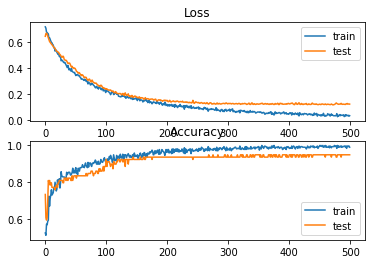

In [82]:
testModel(X_train,X_test,y_train,y_test,32,64,'binary_crossentropy','adam',500)

Kao što se može videti za train set dobijamo **accuracy** je **1**, što znači da je došlo do overfittinga. Takođe, to se može može uočiti i na osnovu grafika loss funkcije gde se train loss smanjuje,dok se test loss povećava. To smo rešili dodavanjem **Dropout** sloja nakon hidden sloja i smanjenjem broja neurona u hidden sloj-u sa 64 na 32.

Train: 0.994, Test: 0.937


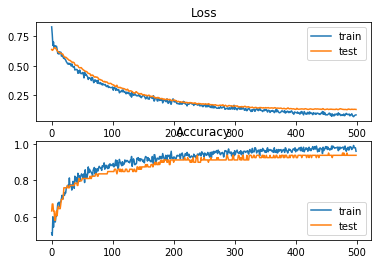

In [92]:
testModel(X_train,X_test,y_train,y_test,32,32,'binary_crossentropy','adam',500)

Zatim, primenili smo SelectKBest, na osnovi čega smo izdvojili najboljih 10 feature-a. 

In [15]:
def univariate_selection(X_train,y_train):
    bestfeatures = SelectKBest(score_func=chi2, k=12)
    fit = bestfeatures.fit(X_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_train.columns)
    # concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
    newScore=featureScores.nlargest(12, 'Score')
    #print(featureScores.nlargest(12, 'Score'))
    return newScore

In [16]:
X = pd.DataFrame(X)
score_us=univariate_selection(X, Y)
print("SCORE")
print(score_us)

SCORE
    Specs      Score
31     31  23.686884
14     14  22.863531
30     30  19.343947
15     15   6.168286
0       0   3.376766
12     12   2.786289
27     27   2.214238
25     25   1.529444
7       7   1.343160
2       2   1.288269
3       3   1.139657
6       6   1.075756


In [17]:
X_10=X.iloc[:,[31,14,30,15,0,12,27,25,7,2]]
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, Y, test_size=0.2)

Train: 0.949, Test: 0.937


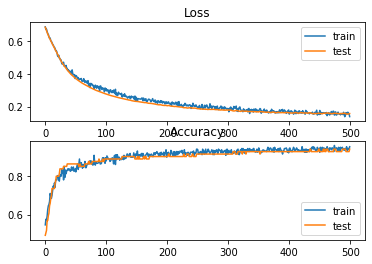

In [93]:
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy','adam',500)

## G1 i G2

Atribut G3, a samim tim i kreirani atribut final imaju veliku korelaciju sa atributima G1 i G2 koji odgovaraju ocenama u 1. i 2. periodu školske godine.Dosta je teže predvideti G3 bez G1 i G2.Hteli smo da vidimo koje ćemo rezultate dobiti.

In [94]:
X_G1G2=X.iloc[:,0:30]
X_train_G1G2, X_test_G1G2, y_train_G1G2, y_test_G1G2 = train_test_split(X_G1G2, Y, test_size=0.2)

Train: 0.877, Test: 0.684


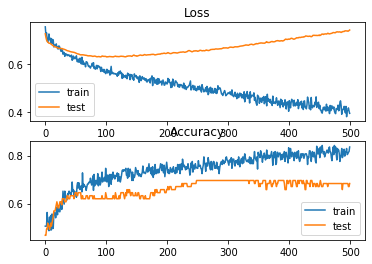

In [95]:
testModel(X_train_G1G2,X_test_G1G2,y_train_G1G2,y_test_G1G2,30,16,'binary_crossentropy','adam',500)

Opet je urađeno izdvajanje najboljih 10 atributa korišćenjem SelectKBest.

In [96]:
X_G1G2 = pd.DataFrame(X_G1G2)
score=univariate_selection(X_G1G2, Y)
print("Score without G1 and G2")
print(score)

Score without G1 and G2
    Specs      Score
14     14  22.863531
15     15   6.168286
0       0   3.376766
12     12   2.786289
27     27   2.214238
25     25   1.529444
7       7   1.343160
2       2   1.288269
3       3   1.139657
6       6   1.075756
1       1   0.914442
13     13   0.903893


In [97]:
X_G1G2_best=X_G1G2.iloc[:,[14,15,0,12,27,25,7,2,3,6]]
X_train_G1G2_best, X_test_G1G2_best, y_train_G1G2_best, y_test_G1G2_best = train_test_split(X_G1G2_best, Y, test_size=0.2)

Train: 0.718, Test: 0.633


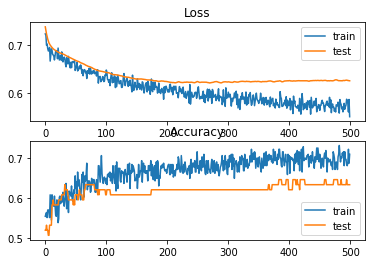

In [99]:
testModel(X_train_G1G2_best,X_test_G1G2_best,y_train_G1G2_best,y_test_G1G2_best,10,8,'binary_crossentropy','adam',500)

## Loss function



Prilikom treniranja svakog modela treba mu dodeliti loss funkciju. Loss funkcija, koja se ponekad zove i cost funkcija, je funkcija koja nam govori koliko je naš trenutni klasifikator dobar. Ona vrši evaluacju kandidata rešenja koje se dobija nakon svake epohe treniranja. Dakle, u procesu treniranje neuronske mreže, težine koje se ažuriraju (**backpropagation** pristupom) teže da se ažuriraju tako da minimizuju datu loss funkciju. Ova funkcija ima jako bitnu vrednost jer sve dobre i loše aspekte trenutnog rešenja kompleksnog sistema treba da svede na jedan broj, odnosno skalar. Upravo iz ovog razloga prilikom dizajniranja modela od presudne je važnosti izabrati loss funkciju koja najviše odgovara problemu koji pokušavamo da rešimo. Ako rešavamo problem regresije preporučeno je koristiti **Mean Squared Error** funkciju gubitka u kombinaciji sa linarnom aktivacionom funkcijom u izlaznom sloju, dok ako je problem binarna klasifikacija preporučuje se korišćenje takozvane **cross-entropije** (koja se naziva još i logaritamski gubitak) u kombinaciji sa **sigmoidalnom aktivacionom funkcijom** u aktivacionom sloju. Za probleme višeklasne klasifikacije koristi se takođe cross-entropija ali sa softmax aktivacionom funkcijom u izlaznom sloju.

Sa obzirom na to da smo problem sveli na problem binarne klasifikacije, odnosno da li je učenik imao više od 10 poena ili ne, odabrali smo binarnu cross-entropiju u kombinaciji sa sigmoidalnom aktivacionom funkcijom u poslednjem sloju neuronske mreže. Zbog toga što verovatnoća zahteva vrednost između 0 i 1 zgodno je koristiti sigmoidalnu funkciju na izlazu koja svaku realnu vrednost odnosno broj izmapira na vrednost između 0 i 1. Što je ulazna vrednost veća funkcija će težiti jedinici, odnosno što je ulazna vrednost manja ona će težiti nuli. Što se tiče binarne cross-entropije ideja koja se krije iza nje je sledeća: treba napraviti funkcijiu koja kada je predviđanje tačno vraća nulu ili vrednost blizu nuli, dok kada je predviđanje pogrešno vraća jako veliku vrednost koja nam upravo signalizira da je predviđanje pogrešno (na ovaj način kažnjava pogrešnu predikciju). Ako pretpostavimo da su y_true stvarne vrednosti iz tabele, a y_pred vrednosti koje je naš model predvideo, onda će funkcija koja bi najbolje modelovala naš problem, odnosno vratiti odgovarajuće izlazne vrednosti izgledati ovako:

**loss = -(y_true * log(y_pred) + (1-y_true) * log(1-y_pred)).**

Ova funkcija između ostalog iskorišćena kao jedna od korisnički implementiranih loss funkcija. Ona ima jako dobre osobine da prvi član zbira ostaje kada je y_true jednako 1, a gubi se kada je y_true jednako 0, odnosno da drugi član zbira ostaje kada je y_true 0, a gubi se kada ono ima vrednost 1.

Train: 0.975, Test: 0.937


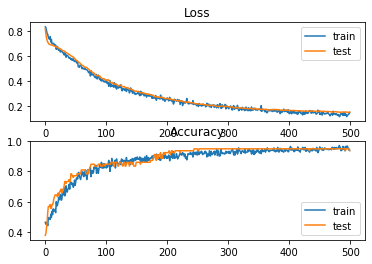

In [101]:
testModel(X_train,X_test,y_train,y_test,32,16,'binary_crossentropy','adam',500)

In [18]:
def calculate_binary_coef(y_true, y_pred):
#    left = y_true * (-K.log(y_pred))
#    right = (1 - y_true) * (- K.log(1- y_pred))
#    return left+right
    left = y_true * K.log(y_pred)
    right = (1-y_true) *  K.log(1-y_pred)
    return -(left + right)

    #return -K.mean(K.sum(y_true* K.log(y_pred)))

def custom_loss_binary():
    def binary(y_true, y_pred):
        return calculate_binary_coef(y_true, y_pred)
    return binary

In [19]:
model_binary = custom_loss_binary()

Train: 0.943, Test: 0.886


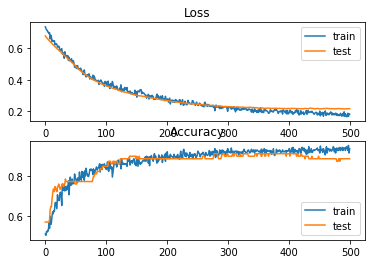

In [21]:
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,16,model_binary,'adam',500)

Druga loss funkcija koja je implementirana je funkcija bazirana na Sorensen-Dice koeficijentu. Osnovna ideja odnosno formula Dice koeficijenta je: 
**Val=(2*|X ∩Y|)/(|X|+ |Y| )**
Kada se ova formula prevede u vektorski prostor dobije se formula korišćena prilikom implementacije same loss funkcije: 
**Val=|a*b|/(|a|^2+ |b|^2 )**


In [152]:
def calculate_dice_coef(y_true, y_pred, smooth):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f))

In [153]:
def custom_loss_dice(smooth):
    def dice(y_true, y_pred):
        return -calculate_dice_coef(y_true, y_pred, smooth)
    return dice

In [154]:
model_dice = custom_loss_dice(smooth=1e-5)

Train: 0.937, Test: 0.899


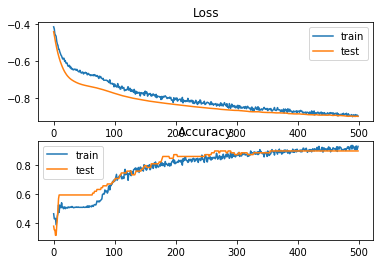

In [155]:
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,16,model_dice,'adam',500)

## Optimizers

Svaki put kada naša neuronska mreža završi sa propuštanjem jednog dela podataka (tzv. batch) kroz mrežu, ona mora odlučiti kako da iskoristi razliku između dobijenih rezultata i stvarnih (očekivanih rezultata) da bi na osnovu nje ažurirala težine čvorova u samoj mreži tako da se mreža kreće ka rešenju, odnosno tačnom rezultatu. Algoritam koji treba da donese odluku kako će se ove vrednosti koristiti za ažuriranje težina naziva se algoritam za optimizaciju (engl. optimization algorithm).
Unutar samog kerasa dostupno je par algoritama za optimizaciju od kojih smo izabrali njih pet čiji smo rad testirali i koji će biti objašnjeni u nastavku: 


### 1)	SGD (Stohastic gradient descent)

* Jedan od osnovnih algoritama za optimizaciju. Kod SGD računa se gradijent funkcije gubitka za svaku težinu unutar mreže. Odnosno, svako propuštanje podataka kroz mrežu (engl. forward pass) ima kao rezultata parametrizovanu funkciju gubitka (engl. loss function). Nakon toga se svaki od gradijenta koji smo izračunali za svaku težinu množi sa izabranim learning rate-om, i na taj način ažuriramo težine tako da se kreću u onom smeru u kome gradijent pokazuje.

* Ovo je jedan od dnajjednostavnijih algoritama. Learning rate treba biti relativno mali. On uvek prati vrednosti gradijenta, i sigurni smo da su nove težine koje se generišu bolje nego one u prethodnoj iteraciji (epohi).

* SGD je dobar za mreže sa malo slojeva (engl. layer-a) ali konvergira ka rešenju znatno sporije od drugih algoritama optimizacije dostupnih u kerasu.

* SGD se može zaglaviti u lokalnim minimumima. 

Train: 0.949, Test: 0.924


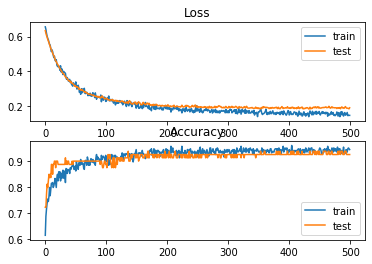

In [161]:
optimizer=tf.keras.optimizers.SGD(lr=0.1)
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy',optimizer,500)

### 2)	 SGD sa Nesterovim momentumom

* Nesterov momentum se uveo kako bi se ubrzala konvergencija ka rešenju korišćenjem momentuma
* Metode koje koriste momentum uzimaju u obzir informacije iz prošlih koraka kako bi odredeli tekući korak. Odnosno algoritmi koji koristi momentum sledeći korak biraju ne samo u zavisnosti od tekućeg izračunavanja sledećeg koraka odnosno odluke, već uzimaju u obzir i korake koje je algoritam uzimao u prošlosti.
* Momentum ima dve osnovne prednosti. On ne može da se zaglavi u lokalnom minimum kao SGD. Omogućava neuronskoj mreži da brže uči tako što nam je sigurnije birati veći learning rate.
* Najjednostavniji načina primenu momentuma je u svakoj epohi učenja kreirati vektor sa opadajučim prosekom vrednosti prethodnih koraka, zatim sumirati taj vektor sa tekućim gradijentom i ažurirati težine u smeru sumiranog vektora.
* Nesterov momentum je modifikacija ovog pristupa. Naime prvo se načini korak samo na osnovu vektora opadajućih vrednost iz prethodnog koraka, a zatim preračunavaju gradijenti na osnovu nove pozicije (vrši se neka vrsta korekcije). Ovo znači da u jednoj iteraciji dva puta vršimo ažuriranje težina, i ovo je još jedan od razloga zašto je ovaj pristup dobar. 


Train: 0.902, Test: 0.886


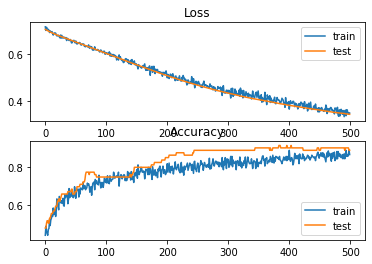

In [165]:
optimizer=tf.keras.optimizers.SGD(momentum=0.01, nesterov=True)
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy',optimizer,500)

### 3)	 Adagrad 

* Sličan SGD-u ali napredniji jer koristići opadajući gradijent sa promenljivim learning rate-om. 
* Težine čvorova koje su istorijski (u prethodnim epohama) imale velike gradijenti dobijaju velike vrednosti za gradijent u trenutnoj epohi, i obrnuto, one koje sui male male gradijente dobijaju male vrednosti gradijenta u trenutnoj epohi. 
* Shodno ovome Adagard zapravo predstavlja SGD sa learning rate scheduler-om za svaki čvor ugrađenim u algoritam. On je poboljšanje SGD-a zato što daje težinama istorijski tačne learning rate-ove, umesto da im daje jedan learning rate za sve čvorove
* Literatura preporučuje koristiti Adagrad algoritam sa default-nim parametrima (upravo zbog ugrađenog learning rate scheduler-a), gde je default-ni learning rate 0.01.


Train: 0.772, Test: 0.785


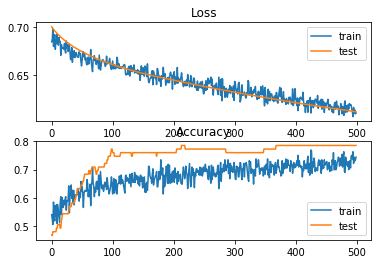

In [166]:
optimizer=tf.keras.optimizers.Adagrad()
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy',optimizer,500)


### 4)	RMSprop 

* Ovaj algoritam razvijen je kao nadogradnja na Adagrad. Kod ovog algoritma svako ažuriranje gradijenta predstavlja sumu (weighted sum) tekućih gradijaenta i srednje vrednosti određenog broja prethodnih ažuriranja gradijenta. Nakon toga se learning rate deli sa srednjom vrednošću kvadrata gradijenata. 
* Preporučuje se da se ovaj algoritam koristi sa default-nim vrednostima. 


Train: 0.949, Test: 0.924


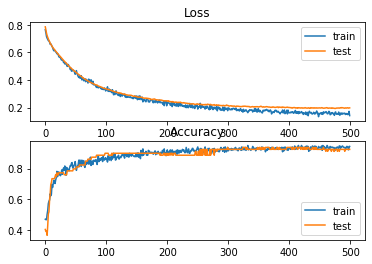

In [167]:
optimizer=tf.keras.optimizers.RMSprop()
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy',optimizer,500)

### 5)	 Adam 

* Adaptive Moment Estimation. 
* Slično kao RMS prop čuva sumu kvadrata prethodnh gradijenata, on takođe čuva informaciju o eksponencijalno opadajućim vrednostima proseka prethodnih gradijenata slično kao momentum.
* Adam je u suštini RMSprop + momentum
* Jedan je od najpopularnijih algoritama za optimizaciju trenutno uglavnom zbog prethodno opisanog ponašanja learning rate-a i momentuma.


Train: 0.949, Test: 0.924


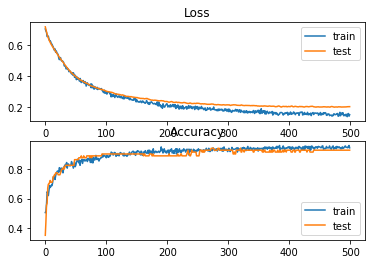

In [169]:
optimizer='adam'
testModel(X_train_10,X_test_10,y_train_10,y_test_10,10,32,'binary_crossentropy',optimizer,500)